# Assignment-04-Simple-Linear-Regression-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1

### Importing Data 

In [3]:
df=pd.read_csv('04_01_delivery_time.csv')
df.head(4)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9


## Step 2

## EDA and Data Visualization

### Checking datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null Values

In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicate Values

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,Delivery Time,Sorting Time


## Step 3

### Plotting the data to check for outliers

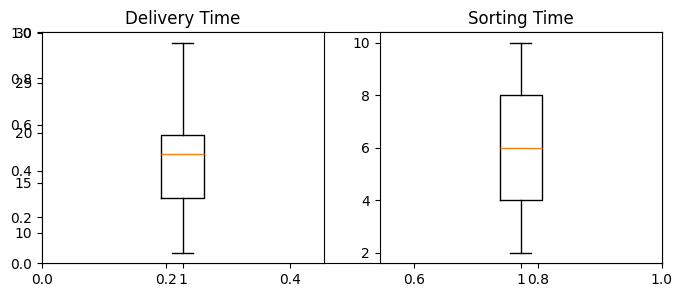

In [9]:
plt.subplots(figsize = (8,3))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

#### As you can see there are no Outliers in the data

## Step 4

### Checking the Correlation between variables

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Visualization of Correlation beteen x and y

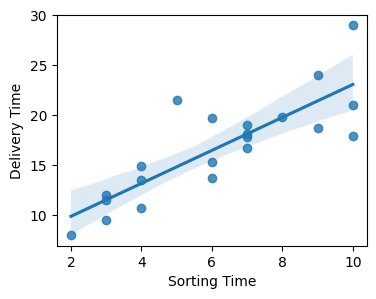

In [11]:
fig = plt.figure(figsize=(4,3))
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  
plt.show()

As you can see above
<ul>
<li>There is good correlation between the two variable.</ki>
<li>The score is more than 0.8 which is a good sign.</li>
</ul>

## Step 5

### Checking for Homoscedasticity or Hetroscedasticity

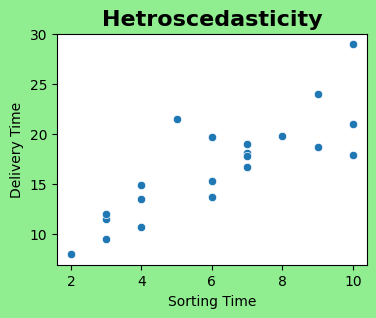

In [12]:
plt.figure(figsize = (4,3), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

As you can see in above graph
<ul>
<li>It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way.</li>
<li>The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.</li>
</ul>

## Step 6

### Feature Engineering

#### Trying different transformation of data to estimate normal distribution and to remove any skewness.

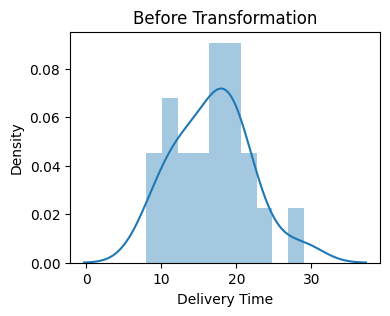

In [14]:
plt.figure(figsize = (4,3))
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
plt.show()

<Figure size 300x200 with 0 Axes>

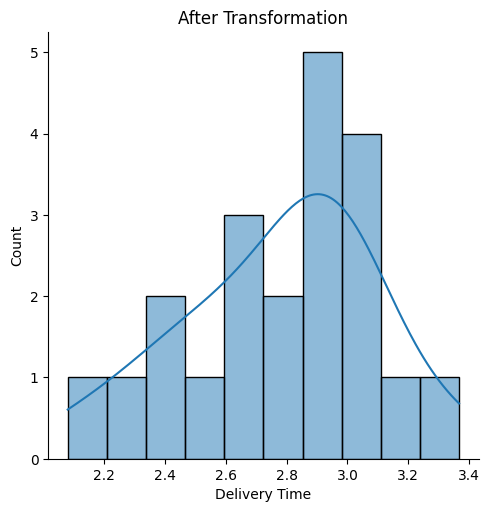

In [15]:
plt.figure(figsize = (3,2))
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

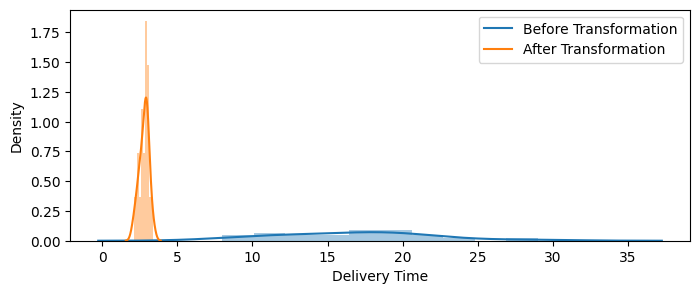

In [16]:
labels = ['Before Transformation','After Transformation']
plt.figure(figsize=(8,3))
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As you can see
<ul>
<li>How log transformation affects the data and it scales the values down.</li>
<li>Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)</li>
</ul>

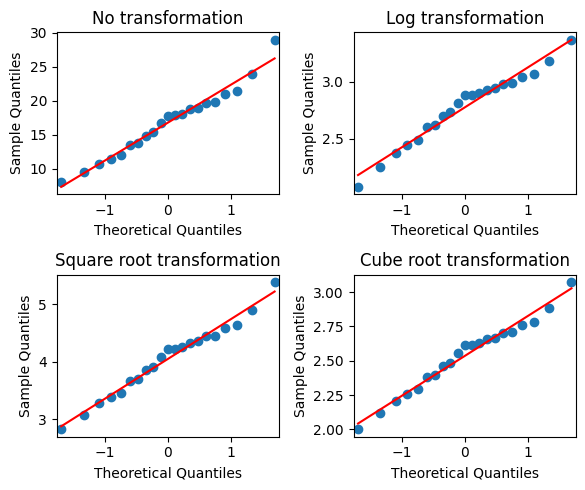

In [17]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(2, 2, figsize=(6, 5))

smg.qqplot(df['Delivery Time'], line='r', ax=axs[0, 0])
axs[0, 0].set_title('No transformation')
smg.qqplot(np.log(df['Delivery Time']), line='r', ax=axs[0, 1])
axs[0, 1].set_title('Log transformation')
smg.qqplot(np.sqrt(df['Delivery Time']), line='r', ax=axs[1, 0])
axs[1, 0].set_title('Square root transformation')
smg.qqplot(np.cbrt(df['Delivery Time']), line='r', ax=axs[1, 1])
axs[1, 1].set_title('Cube root transformation')
plt.tight_layout()
plt.show()

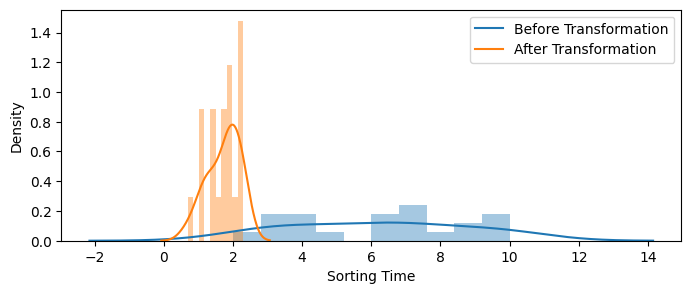

In [18]:
labels = ['Before Transformation','After Transformation']
plt.figure(figsize=(8,3))
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

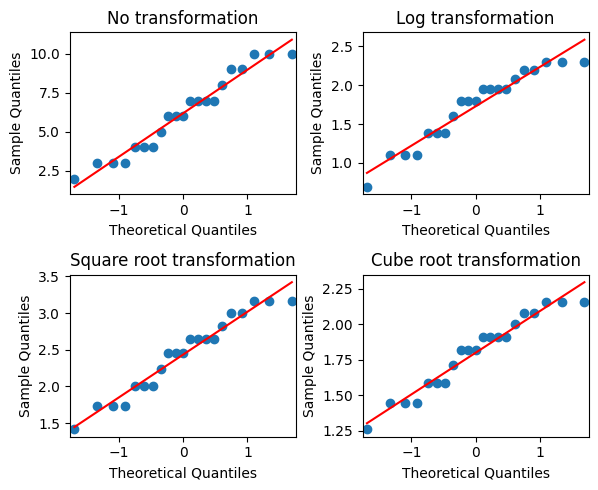

In [19]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(2, 2, figsize=(6, 5))

smg.qqplot(df['Sorting Time'], line='r', ax=axs[0, 0])
axs[0, 0].set_title('No transformation')
smg.qqplot(np.log(df['Sorting Time']), line='r', ax=axs[0, 1])
axs[0, 1].set_title('Log transformation')
smg.qqplot(np.sqrt(df['Sorting Time']), line='r', ax=axs[1, 0])
axs[1, 0].set_title('Square root transformation')
smg.qqplot(np.cbrt(df['Sorting Time']), line='r', ax=axs[1, 1])
axs[1, 1].set_title('Cube root transformation')
plt.tight_layout()
plt.show()

Important Note:  
We only Perform any data transformation when the data is skewed or not normal

## Step 7

### Creating a Linear Regression Model

#### Using Ordinary least squares (OLS) regressione

#### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

#### Rename Columns

In [20]:
df=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)

#### Model Building or Model Fitting

In [21]:
model = smf.ols("Delivery_Time~Sorting_Time",data=df)
result1 = model.fit()

#### Model Testing

##### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.  

##### Measure goodness-of-fit by finding rsquared values (percentage of variance)  

In [22]:
result1.rsquared , result1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

As you can notice in the above model
<ul>
<li>The R-squared and Adjusted R-squared scores are still below 0.85.</li>
<li>(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)</li>
</ul>  
Lets Try some data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Square Root transformation of data

#### Model Building or Model Fitting

In [23]:
model2 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df)
result2 = model2.fit()

#### Model Testing

##### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [24]:
result2.rsquared , result2.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

After Square Root transformation on the Data,
<ul>
<li>R-squared and Adjusted R-squared scores have increased from 0.682 to 0.729 but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.</li>
</ul>  
Lets Try other data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Cube Root transformation of data

#### Model Building or Model Fitting

In [25]:
model3 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df)
result3 = model3.fit()

#### Model Testing

In [26]:
result3.rsquared , result3.rsquared_adj

(0.7441167577566271, 0.7306492186911864)

After Cube Root transformation on the Data,
<ul>
<li>R-squared and Adjusted R-squared scores have increased from 0.729 to 0.744 but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.</li>
</ul>  
Lets Try other data transformation to check whether these scores can get any higher than this.

### Creating LR Model on Log Root transformation of data

#### Model Building or Model Fitting

In [27]:
model4 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df)
result4 = model4.fit()

#### Model Testing

In [28]:
result4.rsquared , result4.rsquared_adj

(0.77216134926874, 0.7601698413355158)

After Log transformation on the Data,
<ul>
<li>R-squared and Adjusted R-squared scores have increased from 0.744 to 0.772 but they are still below 0.85.</li>
<li>Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.</li>
</ul>  

As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [29]:
result4.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [30]:
result4.tvalues, result4.pvalues

(Intercept               13.085552
 np.log(Sorting_Time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(Sorting_Time)    1.601539e-07
 dtype: float64)

##### Determination Coefficient = rsquared value = 0.772 ; very good fit >= 85%

## Step 8

### Test for Normality of Residuals (Q-Q Plot)

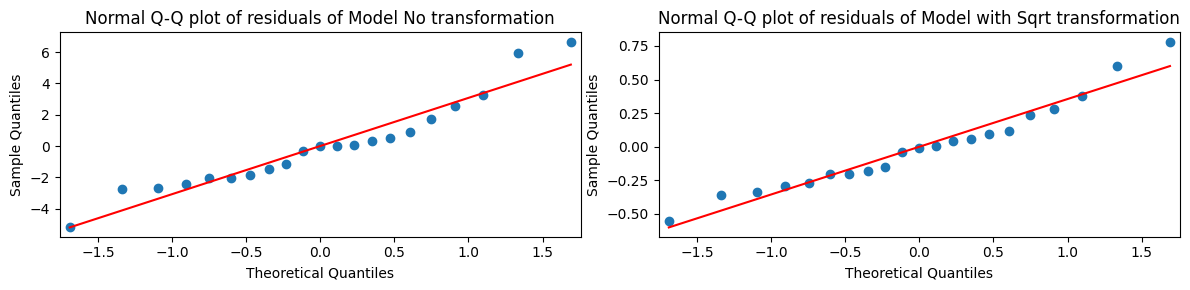

In [31]:
import statsmodels.graphics.gofplots as smg

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

smg.qqplot(result1.resid, line='r', ax=axs[0])
axs[0].set_title('Normal Q-Q plot of residuals of Model No transformation')
smg.qqplot(result2.resid, line='r', ax=axs[1])
axs[1].set_title('Normal Q-Q plot of residuals of Model with Sqrt transformation')
plt.tight_layout()
plt.show()

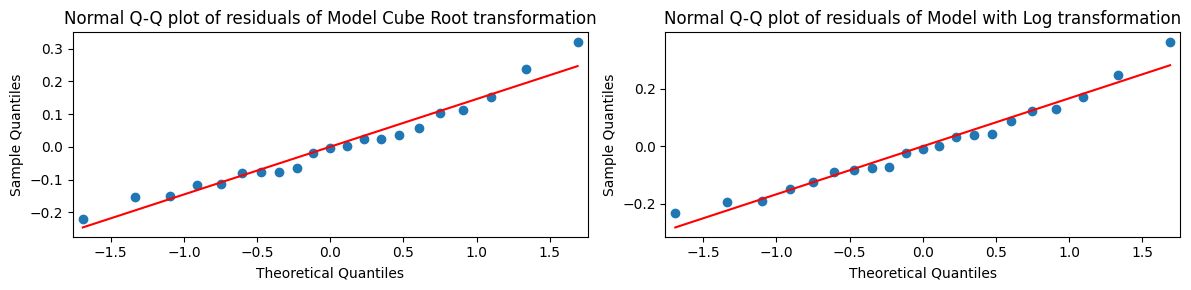

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

smg.qqplot(result3.resid, line='r', ax=axs[0])
axs[0].set_title('Normal Q-Q plot of residuals of Model Cube Root transformation')
smg.qqplot(result4.resid, line='r', ax=axs[1])
axs[1].set_title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.tight_layout()
plt.show()

As you can notice in the above plots, The Models have slightly different plots
<ul>
<li>The first model without transformation is right skewed and doesn't follow normal distribution</li>
<li>The fourth model after log-transformation follows normal distributon with less skewness than first model</li>
</ul>

## Step 9

### Model Validation

#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
result1_pred_y = result1.predict(df['Sorting_Time'])
result2_pred_y = pow(result2.predict(df['Sorting_Time']),2)
result3_pred_y = pow(result3.predict(df['Sorting_Time']),3)
result4_pred_y = np.exp(result4.predict(df['Sorting_Time']))

In [35]:
result1_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], result1_pred_y))
result2_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], result2_pred_y))
result3_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], result3_pred_y))
result4_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], result4_pred_y))
print('model1 =', result1_rmse,'\n' 'model2 =', result2_rmse,'\n' 'model3 =', result3_rmse,'\n' 'model4 =', result4_rmse )

model1 = 2.7916503270617654 
model2 = 2.7622942793208676 
model3 = 2.7555843098935755 
model4 = 2.745828897614548


#### As Model4 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model4 to predict our values
#### Model4 is the model where we did log transformation on both dependent variable as well as on independent variable

## Step 10

### Predicting values from Model with Log Transformation on the Data

In [36]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(result4.predict(predicted.Sorting_Time)))
predicted.head()

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
